### Purpose & Process
The goal of this analysis is to understand the price dynamics and volatility behavior of key construction materials — concrete, general construction materials, copper, and plywood — to support budgeting, procurement, and risk management decisions.

#### Process followed:

Data Collection & Preparation: Imported historical price indices, set monthly frequency, and cleaned data.

Exploratory Analysis: Visualized trends and seasonal patterns; decomposed series to identify trend, seasonality, and residuals.

Modeling Approach: Applied ARIMA/SARIMAX models to capture trend and seasonality, and AR-GARCH models to analyze conditional volatility and persistence.

Evaluation & Interpretation: Assessed stationarity, model fit, and volatility persistence; compared behavior across materials.

Findings & Recommendations: Summarized key insights and proposed next steps for risk management and further model improvement.

In [1]:
# Import libraries for numerical operations, visualization, and time series modeling (including ARIMA, SARIMAX, and GARCH models)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model

In [2]:
# Load datasets related to construction materials and set the date column as the index
Concrete = pd.read_csv("Concrete.csv",parse_dates=['observation_date'], index_col='observation_date')
Construction_Materials = pd.read_csv("Construction_Materials.csv", parse_dates=["observation_date"], index_col ="observation_date")
Copper = pd.read_csv("Copper.csv", parse_dates=["observation_date"], index_col="observation_date")
Plywood = pd.read_csv("Plywood.csv", parse_dates=["observation_date"], index_col ="observation_date")

In [3]:
# Set the frequency of the time series to month start (MS) for consistent time series handling
Concrete.index.freq = 'MS' 
Construction_Materials.index.freq = 'MS' 
Copper.index.freq = 'MS' 
Plywood.index.freq = 'MS' 

In [4]:
#Revewing data frame layout and information
Concrete

,WPU133
observation_date,
1950-01-01,25.800
1950-02-01,25.800
1950-03-01,25.800
1950-04-01,25.800
1950-05-01,25.900
...,...
2025-01-01,391.790
2025-02-01,392.073
2025-03-01,392.004


In [5]:
# Reviewing data frame for columns and column information
Concrete.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 905 entries, 1950-01-01 to 2025-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WPU133  905 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


In [6]:
# Reviewing data frame for columns and column information
Construction_Materials.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 905 entries, 1950-01-01 to 2025-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WPUSI012011  905 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


In [7]:
# Reviewing data frame for columns and column information
Copper.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 905 entries, 1950-01-01 to 2025-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WPU102  905 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


In [8]:
# Reviewing data frame for columns and column information
Plywood.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 905 entries, 1950-01-01 to 2025-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WPU083  905 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


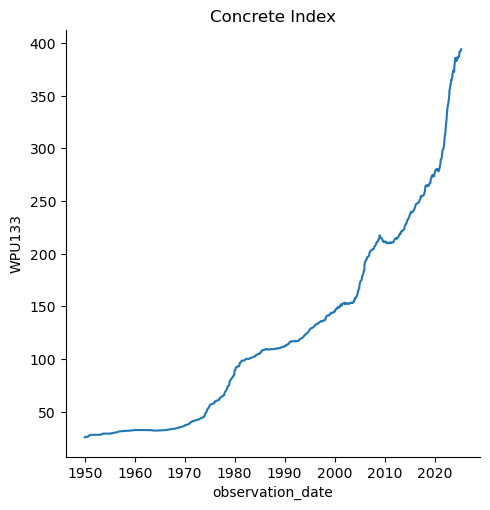

In [9]:
# Plot the time series of the dataset to visualize trends and seasonality
sns.relplot(kind="line", x="observation_date", y="WPU133", data=Concrete)
plt.title("Concrete Index")
plt.show()

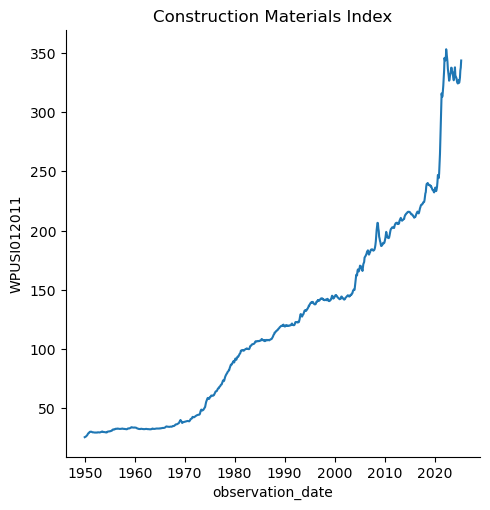

In [10]:
# Plot the time series of the dataset to visualize trends and seasonality
sns.relplot(kind="line", x="observation_date", y="WPUSI012011", data=Construction_Materials)
plt.title("Construction Materials Index")
plt.show()

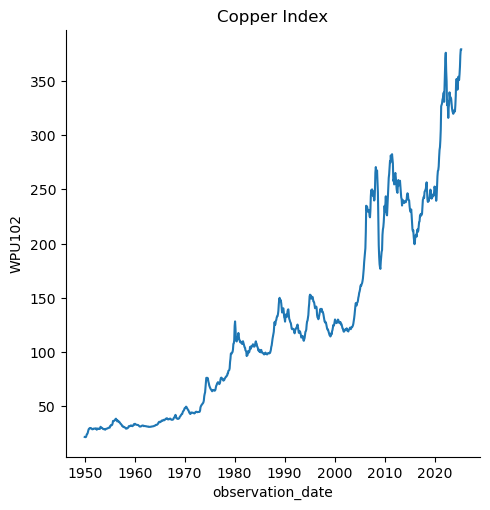

In [11]:
# Plot the time series of the dataset to visualize trends and seasonality
sns.relplot(kind="line", x="observation_date", y="WPU102", data=Copper)
plt.title("Copper Index")
plt.show()

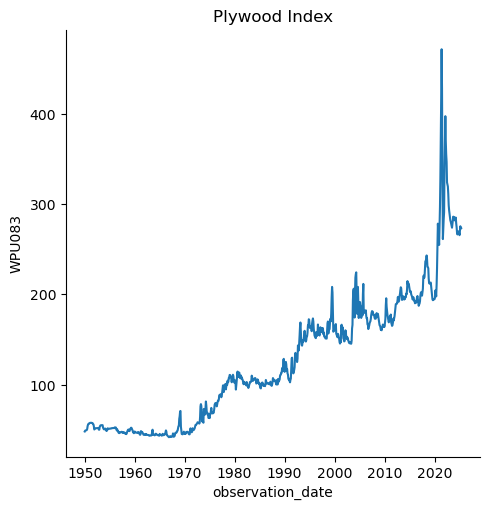

In [12]:
# Plot the time series of the dataset to visualize trends and seasonality
sns.relplot(kind="line", x="observation_date", y="WPU083", data=Plywood)
plt.title("Plywood Index")
plt.show()

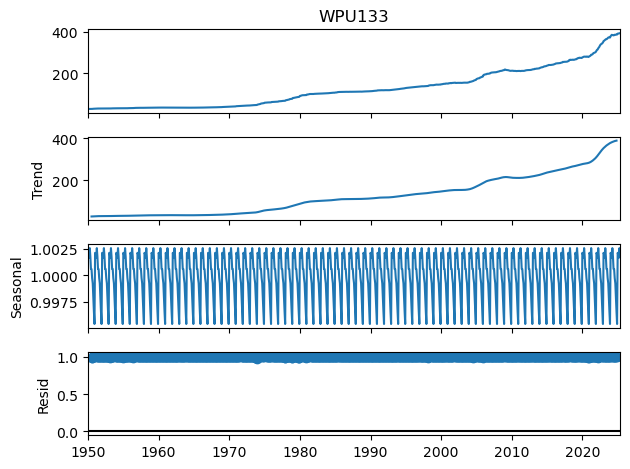

In [13]:
# Reviewed seaonality for the data set and associated residuals
result_con = seasonal_decompose(Concrete["WPU133"], model='multiplicative')
result_con.plot()
plt.show()

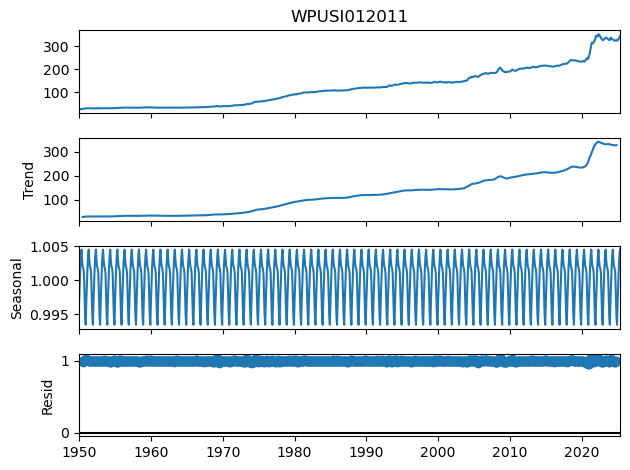

In [14]:
# Reviewed seaonality for the data set and associated residuals
result_con_mat = seasonal_decompose(Construction_Materials["WPUSI012011"], model='multiplicative')
result_con_mat.plot()
plt.show()

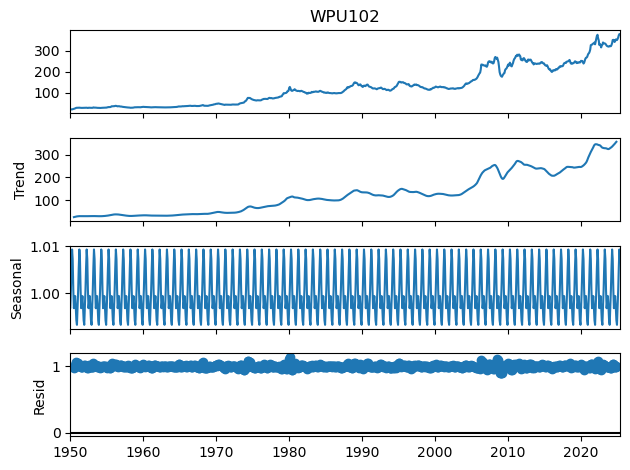

In [15]:
# Reviewed seaonality for the data set and associated residuals
result_cop = seasonal_decompose(Copper["WPU102"], model='mutiplicative')
result_cop.plot()
plt.show()

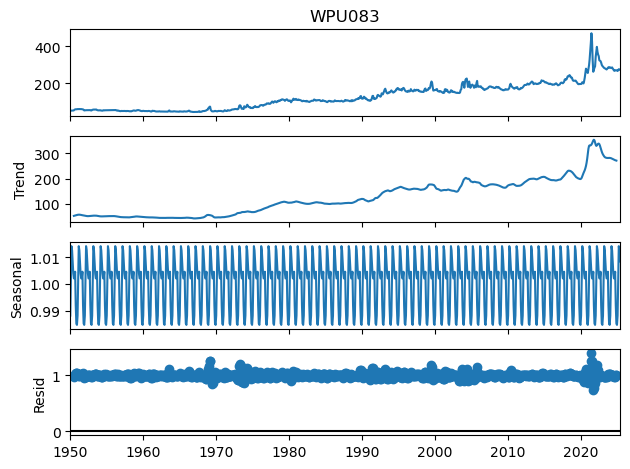

In [16]:
# Reviewed seaonality for the data set and associated residuals
result_ply = seasonal_decompose(Plywood["WPU083"], model='multiplicative')
result_ply.plot()
plt.show()

In [17]:
# Perform the Augmented Dickey-Fuller (ADF) test
adf_result_con = adfuller(Concrete["WPU133"])
adf_result_con_mat = adfuller(Construction_Materials["WPUSI012011"])
adf_result_cop = adfuller(Copper["WPU102"])
adf_result_ply = adfuller(Plywood["WPU083"])

In [18]:
#Confirmed ADF performance and differencing to achieve acceptable p_values 
print(f'ADF Statistic: {adf_result_con[0]}')
print(f'p_value: {adf_result_con[1]}')

Concrete["diff"] = Concrete["WPU133"].diff().dropna()

print(f'ADF Statistic: {adf_result_con_mat[0]}')
print(f'p_value: {adf_result_con_mat[1]}')

Construction_Materials["diff"] = Construction_Materials["WPUSI012011"].diff().dropna()

print(f'ADF Statistic: {adf_result_cop[0]}')
print(f'p_value: {adf_result_cop[1]}')

Copper["diff"] = Copper["WPU102"].diff().dropna()

print(f'ADF Statistic: {adf_result_ply[0]}')
print(f'p_value: {adf_result_ply[1]}')

Plywood["diff"] = Plywood["WPU083"].diff().dropna()

ADF Statistic: 3.5019101008932236
p_value: 1.0
ADF Statistic: 2.7584388921940337
p_value: 1.0
ADF Statistic: 0.8448794714428489
p_value: 0.9923271310214297
ADF Statistic: -0.6430963989994345
p_value: 0.8609436970800419


In [19]:
#Confirmed ADF performance and that they met acceptable standards for time series analysis
adf_result_diff_con = adfuller(Concrete['diff'].dropna())
print(f"ADF Statistic after differencing: {adf_result_diff_con[0]}")
print(f"p-value after differencing: {adf_result_diff_con[1]}")

adf_result_diff_con_mat = adfuller(Construction_Materials['diff'].dropna())
print(f"ADF Statistic after differencing: {adf_result_diff_con_mat[0]}")
print(f"p-value after differencing: {adf_result_diff_con_mat[1]}")

adf_result_diff_cop = adfuller(Copper['diff'].dropna())
print(f"ADF Statistic after differencing: {adf_result_diff_cop[0]}")
print(f"p-value after differencing: {adf_result_diff_cop[1]}")

adf_result_diff_ply = adfuller(Plywood['diff'].dropna())
print(f"ADF Statistic after differencing: {adf_result_diff_ply[0]}")
print(f"p-value after differencing: {adf_result_diff_ply[1]}")

ADF Statistic after differencing: -4.7126787455222585
p-value after differencing: 7.96568531618508e-05
ADF Statistic after differencing: -6.382358421485701
p-value after differencing: 2.2063336388663836e-08
ADF Statistic after differencing: -6.9474615226076315
p-value after differencing: 9.887575823826127e-10
ADF Statistic after differencing: -10.613872534253787
p-value after differencing: 5.741103873278183e-19


In [20]:
# Performing ARIMA modeling using approperiate differentiating noted above. Results suggest model does not meet assumption requirements as residuals exhibited non-normality, heteroskedasticity, and autocorrelation.
con_model = ARIMA(Concrete["WPU133"], order=(1, 1, 1))
con_fit = con_model.fit()
print("con_fit Results")
print(con_fit.summary())

con_mat_model = ARIMA(Construction_Materials["WPUSI012011"], order=(1, 1, 1))
con_mat_fit = con_mat_model.fit()
print("con_mat_fit Results")
print(con_mat_fit.summary())

cop_model = ARIMA(Copper["WPU102"], order=(1, 1, 1))
cop_fit = cop_model.fit()
print("cop_fit Results")
print(cop_fit.summary())

ply_model = ARIMA(Plywood["WPU083"], order=(1, 1, 1))
ply_fit = ply_model.fit()
print("ply_fit Results")
print(ply_fit.summary())

con_fit Results
                               SARIMAX Results                                
Dep. Variable:                 WPU133   No. Observations:                  905
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1030.382
Date:                Fri, 25 Jul 2025   AIC                           2066.764
Time:                        00:29:26   BIC                           2081.185
Sample:                    01-01-1950   HQIC                          2072.272
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9849      0.003    314.946      0.000       0.979       0.991
ma.L1         -0.8379      0.010    -87.065      0.000      -0.857      -0.819
sigma2         0.5714      0.010    

In [21]:
# Forecasted future values based on the material's ARIMA model
con_forecast = con_fit.get_forecast(steps=12)
con_forecast_df = con_forecast.summary_frame().reset_index()

con_mat_forecast = con_mat_fit.get_forecast(steps=12)
con_mat_forecast_df = con_mat_forecast.summary_frame().reset_index()

cop_forecast = cop_fit.get_forecast(steps=12)
cop_forecast_df = cop_forecast.summary_frame().reset_index()

ply_forecast = ply_fit.get_forecast(steps=12)
ply_forecast_df = ply_forecast.summary_frame().reset_index()

In [22]:
# Confirmed data frame formatting
con_forecast_df

WPU133,index,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2025-06-01,395.071193,0.755919,393.589619,396.552767
1,2025-07-01,395.973511,1.150245,393.719071,398.227950
2,2025-08-01,396.862164,1.508753,393.905063,399.819265
3,2025-09-01,397.737358,1.857837,394.096065,401.378651
4,2025-10-01,398.599299,2.206366,394.274900,402.923698
5,2025-11-01,399.448186,2.558158,394.434289,404.462082
6,2025-12-01,400.284216,2.915016,394.570891,405.997542
7,2026-01-01,401.107586,3.277803,394.683210,407.531962
8,2026-02-01,401.918486,3.646894,394.770706,409.066267
9,2026-03-01,402.717106,4.022391,394.833365,410.600847


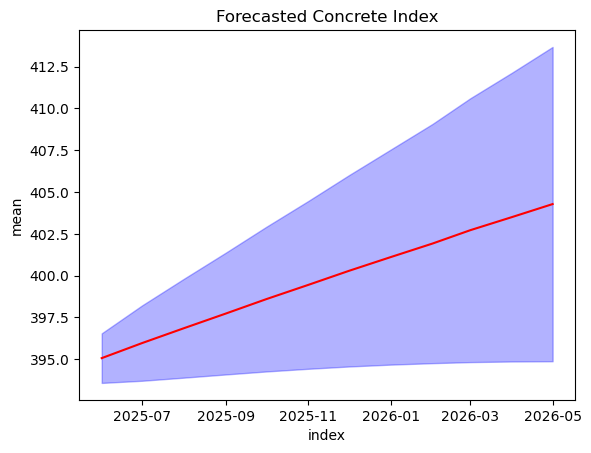

In [23]:
# Compared to other construction materials, the forecast for this series shows a steeper slope, indicating higher early-stage risk, but has the narrowest confidence interval, suggesting more certainty in long-term cost projections.
sns.lineplot(data = con_forecast_df, x= "index", y = "mean", color="red")
plt.fill_between(con_forecast_df["index"], con_forecast_df["mean_ci_lower"], con_forecast_df["mean_ci_upper"], alpha = 0.3, color="blue")
plt.title("Forecasted Concrete Index")
plt.show()

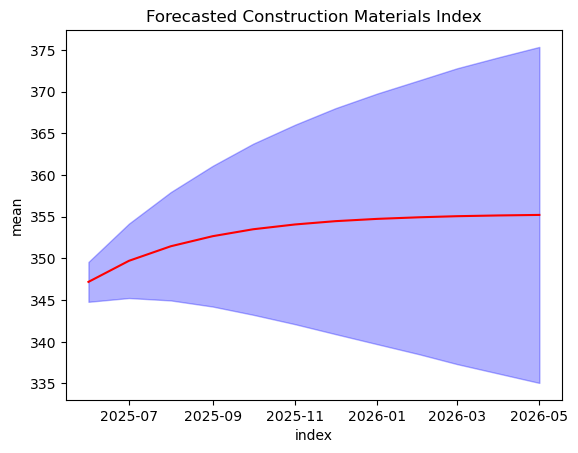

In [24]:
# The forecast for this series shows a positive slope reducing to zero, indicating initial early-stage risk, but has a larger confidence interval, suggesting less certainty in long-term cost projections.
sns.lineplot(data = con_mat_forecast_df, x= "index", y = "mean", color="red")
plt.fill_between(con_mat_forecast_df["index"], con_mat_forecast_df["mean_ci_lower"], con_mat_forecast_df["mean_ci_upper"], alpha = 0.3, color="blue")
plt.title("Forecasted Construction Materials Index")
plt.show()

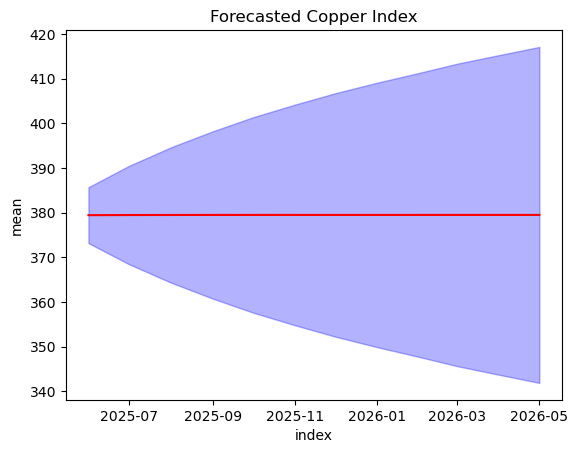

In [25]:
# The forecast for this series shows no slope, indicating no early-stage risk, but has a larger confidence interval, suggesting less certainty in long-term cost projections.
sns.lineplot(data=cop_forecast_df, x="index", y="mean", color="red")
plt.fill_between(cop_forecast_df["index"], cop_forecast_df["mean_ci_lower"], cop_forecast_df["mean_ci_upper"], alpha=0.3, color="blue")
plt.title("Forecasted Copper Index")
plt.show()

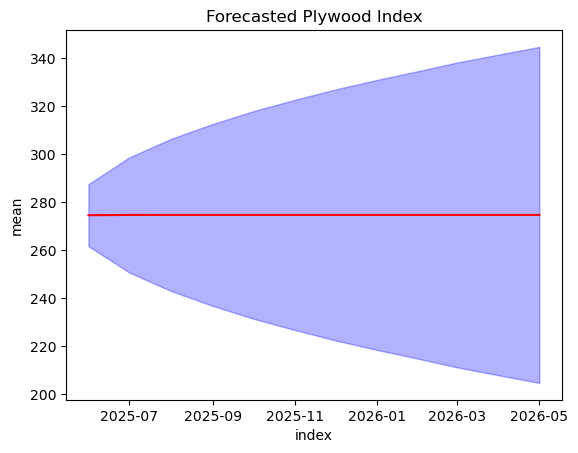

In [26]:
# The forecast for this series shows no slope, indicating no early-stage risk, but has the largest confidence interval, suggesting the most uncertainty in long-term cost projections.
sns.lineplot(data = ply_forecast_df, x= "index", y = "mean", color="red")
plt.fill_between(ply_forecast_df["index"], ply_forecast_df["mean_ci_lower"], ply_forecast_df["mean_ci_upper"], alpha = 0.3, color="blue")
plt.title("Forecasted Plywood Index")
plt.show()

In [27]:
# Logged the data to stabilize variance and reduce heteroskedasticity in the financial time series
Concrete["WPU133"] = np.log(Concrete["WPU133"])
Construction_Materials["WPUSI012011"] = np.log(Construction_Materials["WPUSI012011"])
Copper["WPU102"] = np.log(Copper["WPU102"])
Plywood["WPU083"] = np.log(Plywood["WPU083"])

In [28]:
# Perform the Augmented Dickey-Fuller (ADF) test
adf_result_con = adfuller(Concrete["WPU133"])
adf_result_con_mat = adfuller(Construction_Materials["WPUSI012011"])
adf_result_cop = adfuller(Copper["WPU102"])
adf_result_ply = adfuller(Plywood["WPU083"])

In [29]:
# ARIMA models were completed for all materials. Heteroskedasticity was reduced, but key assumptions (e.g., normality, independence) were still not fully satisfied.
con_model = ARIMA(Concrete["WPU133"], order=(1, 1, 1))
con_fit = con_model.fit()
print("con_fit Results")
print(con_fit.summary())

con_mat_model = ARIMA(Construction_Materials["WPUSI012011"], order=(1, 1, 1))
con_mat_fit = con_mat_model.fit()
print("con_mat_fit Results")
print(con_mat_fit.summary())

cop_model = ARIMA(Copper["WPU102"], order=(1, 1, 1))
cop_fit = cop_model.fit()
print("cop_fit Results")
print(cop_fit.summary())

ply_model = ARIMA(Plywood["WPU083"], order=(1, 1, 1))
ply_fit = ply_model.fit()
print("ply_fit Results")
print(ply_fit.summary())

C:\Users\19292\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


con_fit Results
                               SARIMAX Results                                
Dep. Variable:                 WPU133   No. Observations:                  905
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3505.313
Date:                Fri, 25 Jul 2025   AIC                          -7004.625
Time:                        00:29:27   BIC                          -6990.205
Sample:                    01-01-1950   HQIC                         -6999.118
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9865      0.006    156.962      0.000       0.974       0.999
ma.L1         -0.8649      0.016    -54.185      0.000      -0.896      -0.834
sigma2      2.501e-05    5.7e-07    

In [30]:
con_forecast = con_fit.get_forecast(steps=12)
con_forecast_df = con_forecast.summary_frame().reset_index()

con_mat_forecast = con_mat_fit.get_forecast(steps=12)
con_mat_forecast_df = con_mat_forecast.summary_frame().reset_index()

cop_forecast = cop_fit.get_forecast(steps=12)
cop_forecast_df = cop_forecast.summary_frame().reset_index()

ply_forecast = ply_fit.get_forecast(steps=12)
ply_forecast_df = ply_forecast.summary_frame().reset_index()

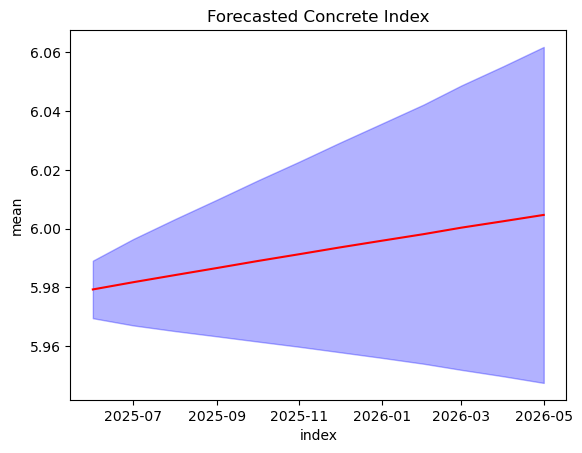

In [31]:
# Compared to other construction materials, the forecast for this series shows the steepest slope, indicating higher early-stage risk, but has the narrowest confidence interval, suggesting more certainty in long-term cost projections.
sns.lineplot(data = con_forecast_df, x= "index", y = "mean", color="red")
plt.fill_between(con_forecast_df["index"], con_forecast_df["mean_ci_lower"], con_forecast_df["mean_ci_upper"], alpha = 0.3, color="blue")
plt.title("Forecasted Concrete Index")
plt.show()

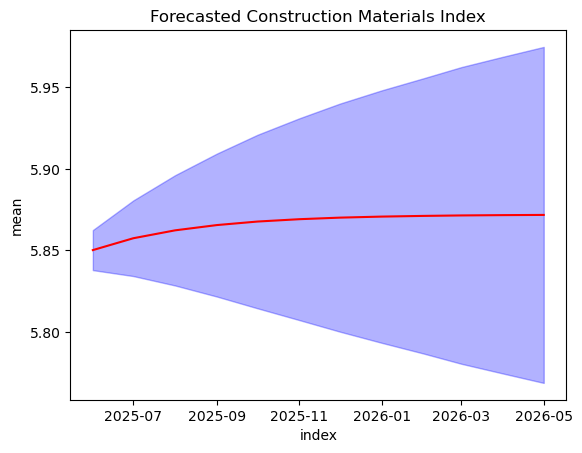

In [32]:
# The forecast for this series shows a positive slope reducing to zero, indicating initial early-stage risk, but has a larger confidence interval, suggesting less certainty in long-term cost projections.
sns.lineplot(data = con_mat_forecast_df, x= "index", y = "mean", color="red")
plt.fill_between(con_mat_forecast_df["index"], con_mat_forecast_df["mean_ci_lower"], con_mat_forecast_df["mean_ci_upper"], alpha = 0.3, color="blue")
plt.title("Forecasted Construction Materials Index")
plt.show()

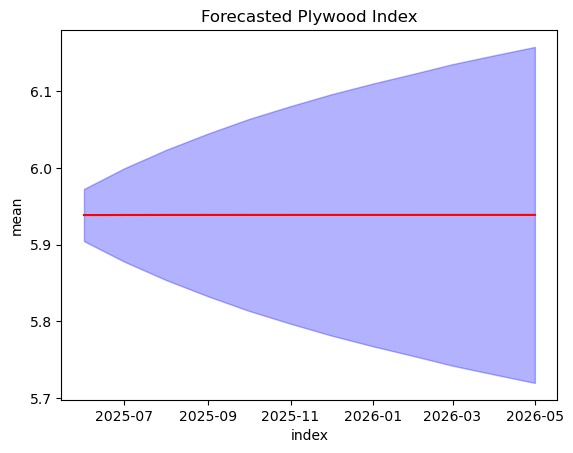

In [33]:
# The forecast for this series shows no slope, indicating no early-stage risk, but has a larger confidence interval, suggesting less certainty in long-term cost projections.
sns.lineplot(data = cop_forecast_df, x= "index", y = "mean", color="red")
plt.fill_between(cop_forecast_df["index"], cop_forecast_df["mean_ci_lower"], cop_forecast_df["mean_ci_upper"], alpha = 0.3, color="blue")
plt.title("Forecasted Plywood Index")
plt.show()

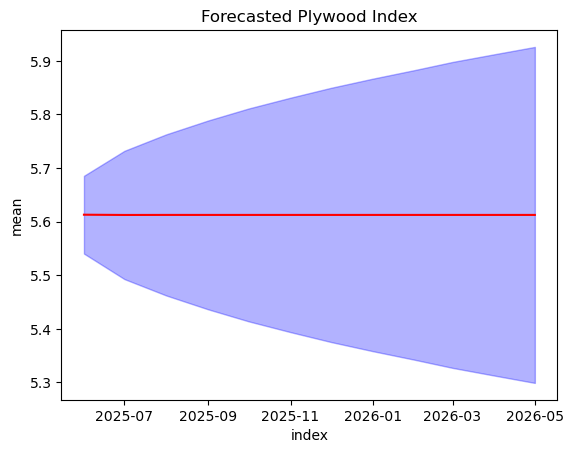

In [34]:
# The forecast for this series shows no slope, indicating no early-stage risk, but has the largest confidence interval, suggesting the most uncertainty in long-term cost projections.
sns.lineplot(data = ply_forecast_df, x= "index", y = "mean", color="red")
plt.fill_between(ply_forecast_df["index"], ply_forecast_df["mean_ci_lower"], ply_forecast_df["mean_ci_upper"], alpha = 0.3, color="blue")
plt.title("Forecasted Plywood Index")
plt.show()

In [35]:
# Applied GARCH modeling to account for time-varying volatility and address residual issues from ARIMA,including heteroskedasticity and autocorrelation.
# Multiplied values by 100 to improve model convergence
# Model lags were selected based on statistical significance to ensure optimal fit.
m = 1

con_y = 10*Concrete["diff"].dropna()
con_mat_y = 10*Construction_Materials["diff"].dropna()
cop_y = 10*Copper["diff"].dropna()
ply_y = 10*Plywood["diff"].dropna()


con_armodel = arch_model(con_y, mean='AR', lags=5, vol='Garch', p=1, q=1)
con_arfit = con_armodel.fit(disp='off')
print(con_arfit.summary())

con_mat_armodel = arch_model(con_mat_y, mean ='AR', lags=m, vol='Garch', p=1, q=1)
con_mat_arfit = con_mat_armodel.fit(disp='off')
print(con_mat_arfit.summary())

cop_armodel = arch_model(cop_y, mean='AR', lags=m, vol ='Garch', p=1, q=1)
cop_arfit = cop_armodel.fit(disp='off')
print(cop_arfit.summary())

ply_armodel = arch_model(ply_y, mean ='AR', lags=8, vol='Garch', p=1, q=1)
ply_arfit = ply_armodel.fit(disp='off')
print(ply_arfit.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   diff   R-squared:                       0.273
Mean Model:                        AR   Adj. R-squared:                  0.268
Vol Model:                      GARCH   Log-Likelihood:               -2541.83
Distribution:                  Normal   AIC:                           5101.66
Method:            Maximum Likelihood   BIC:                           5144.87
                                        No. Observations:                  899
Date:                Fri, Jul 25 2025   Df Residuals:                      893
Time:                        00:29:29   Df Model:                            6
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.1473  5.893e-02      2.499  1.246e-02 [3.176e-0

In [36]:
# Created function to forecast 12 months ahead using the optimized AR-GARCH Model, including removing scaling factor for convergence
def ARGARCH (fit):
    horizon = 12
    forcast = fit.forecast(horizon=horizon)

    mean_forecast = forcast.mean.iloc[-1]
    var_forecast = forcast.variance.iloc[-1]
    std_forecast = var_forecast**0.5

    
    summary_df = pd.DataFrame({
        "mean_forecast": mean_forecast/100,
        "variance_forecast": var_forecast/100,
        "std_dev_forecast":std_forecast/100
    })
    print(summary_df)
    plt.figure(figsize=(10,6))

    steps = np.arange(1, horizon + 1)
    
    sns.lineplot(x=steps, y="mean_forecast", data=summary_df, color="red", label = "Mean Forecast")
    plt.fill_between(steps, summary_df[ "mean_forecast"]-summary_df[ "std_dev_forecast"], summary_df[ "mean_forecast"]+summary_df[ "std_dev_forecast"], alpha=0.3, color="blue", label = "Standard Deviation")
    plt.title("AR-GARCH Modeling with Standard Deviation")
    plt.xlabel("Steps Ahead")
    plt.ylabel("Forecasted Value")
    plt.legend()
    plt.show()

    

      mean_forecast  variance_forecast  std_dev_forecast
h.01       0.117899           3.811029          0.195219
h.02       0.063767           3.891888          0.197279
h.03       0.071878           4.122936          0.203050
h.04       0.081394           4.332823          0.208154
h.05       0.076257           4.631872          0.215218
h.06       0.072784           5.029422          0.224264
h.07       0.065157           5.203812          0.228119
h.08       0.065331           5.405150          0.232490
h.09       0.063773           5.590302          0.236438
h.10       0.060897           5.773284          0.240277
h.11       0.058318           5.938731          0.243695
h.12       0.055813           6.075843          0.246492


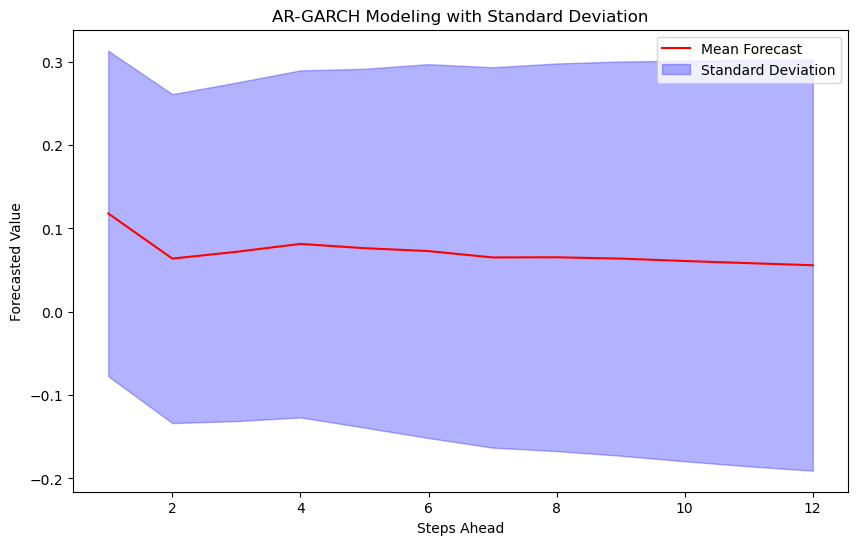

In [37]:
# Forecasted values indicate a generally slight downward slope, suggesting low early-stage risk.
# The small standard deviation reflects reduced long-term risk and uncertainty.
ARGARCH(con_arfit)

      mean_forecast  variance_forecast  std_dev_forecast
h.01       0.310188           9.269825          0.304464
h.02       0.162558          11.718135          0.342318
h.03       0.086701          12.365417          0.351645
h.04       0.047724          12.537190          0.354079
h.05       0.027696          12.583417          0.354731
h.06       0.017405          12.596498          0.354915
h.07       0.012117          12.600828          0.354976
h.08       0.009400          12.602847          0.355005
h.09       0.008004          12.604256          0.355025
h.10       0.007287          12.605504          0.355042
h.11       0.006918          12.606710          0.355059
h.12       0.006729          12.607904          0.355076


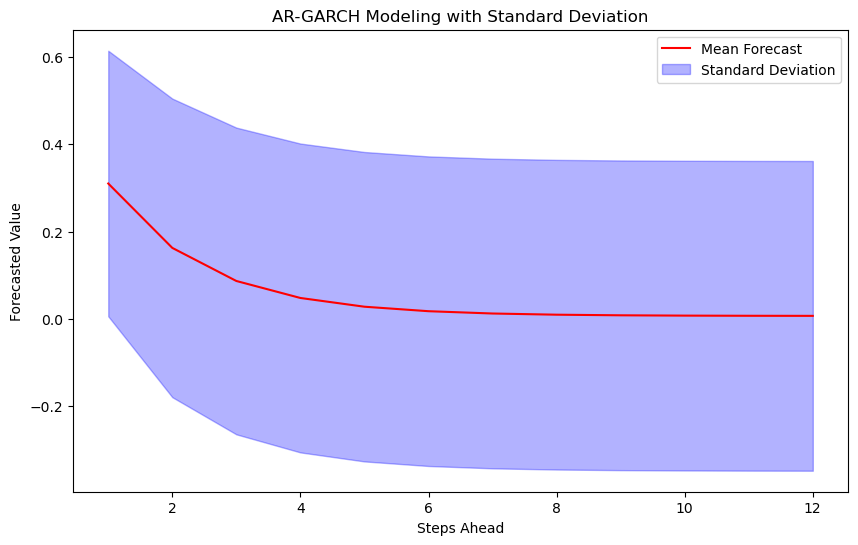

In [38]:
# Forecasted values indicate the largest downward slope, suggesting the lowest early-stage risk.
# The moderate standard deviation reflects moderate long-term risk and uncertainty.
ARGARCH(con_mat_arfit)

      mean_forecast  variance_forecast  std_dev_forecast
h.01       0.002255          24.306669          0.493018
h.02       0.005218          29.134152          0.539761
h.03       0.006536          30.103233          0.548664
h.04       0.007123          30.308048          0.550527
h.05       0.007384          30.361480          0.551013
h.06       0.007500          30.384925          0.551225
h.07       0.007552          30.402431          0.551384
h.08       0.007575          30.418760          0.551532
h.09       0.007585          30.434857          0.551678
h.10       0.007589          30.450907          0.551823
h.11       0.007592          30.466948          0.551969
h.12       0.007592          30.482987          0.552114


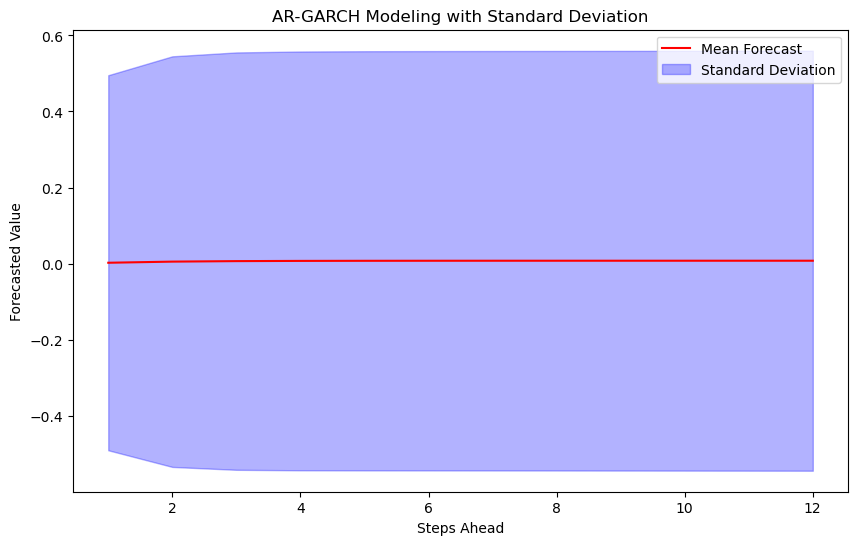

In [39]:
# Forecasted values indicate no significant slope, suggesting low early-stage risk.
# The largest standard deviation reflects the greatest long-term risk and uncertainty.
ARGARCH(cop_arfit)

      mean_forecast  variance_forecast  std_dev_forecast
h.01      -0.034038          10.141894          0.318463
h.02      -0.040409          10.713401          0.327313
h.03       0.013619          11.015428          0.331895
h.04      -0.025612          11.348854          0.336881
h.05      -0.019883          11.774903          0.343146
h.06       0.007271          12.042251          0.347019
h.07       0.011563          12.290720          0.350581
h.08       0.010232          12.544631          0.354184
h.09       0.007794          12.790188          0.357634
h.10       0.003139          13.037259          0.361071
h.11       0.002162          13.286203          0.364502
h.12       0.002225          13.533913          0.367885


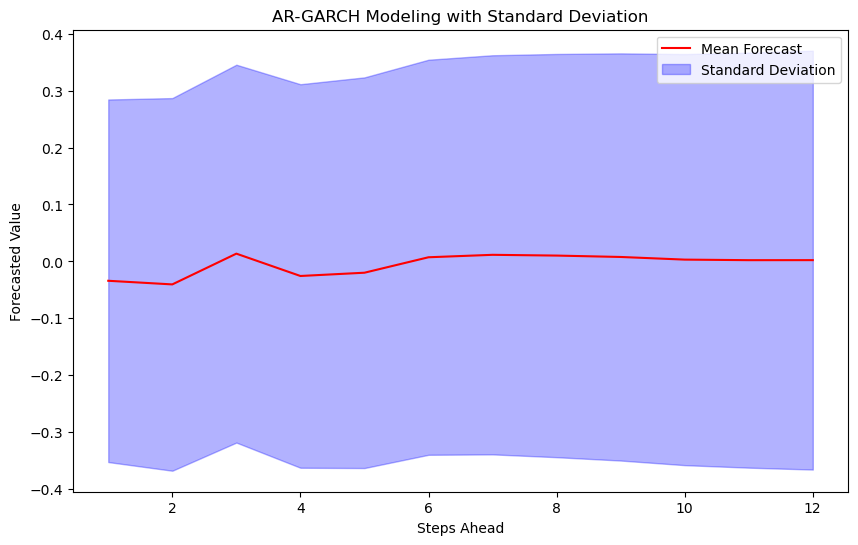

In [40]:
# Forecasted values indicate a slight positive slope, suggesting low early-stage risk.
# The moderate standard deviation reflects a moderate long-term risk and uncertainty.
ARGARCH(ply_arfit)

### Findings
Volatility clustering detected: All GARCH models showed significant α (ARCH) and β (GARCH) terms, confirming that past shocks and conditional variance strongly influence future volatility.

High persistence of volatility: β values between 0.77 and 0.92 indicate volatility shocks decay slowly, implying prolonged periods of elevated uncertainty in material prices.

Mean reversion with short-term momentum: AR terms (lagged differences) were statistically significant in most models, suggesting that prices tend to revert to a trend but retain short-term autocorrelation.

Model fit: R² values ranged from 0.19 to 0.34, typical for financial and commodity time series where returns are largely unpredictable.

Practical implication: Copper and other materials exhibit periods of persistent volatility, making risk management strategies (hedging, scenario planning) essential.

Material-specific insights:

    Plywood showed the strongest momentum after a shock or event.

    Concrete exhibited the slowest return to stable prices after shocks, indicating high persistence in deviations.

    General construction materials and copper displayed similar patterns of volatility clustering and moderate reversion.

    Practical implication: Materials such as copper and plywood require active risk management (e.g., hedging or scenario planning) due to their persistent and clustered volatility.

### Next Steps & Recommendations
Incorporate external regressors: Explore adding macroeconomic indicators or industry-specific variables (e.g., housing starts, commodity supply constraints) to improve forecast accuracy.

Isolate more recent activity: Focus modeling and forecasting on the last 20 years to better capture current economic and political factors influencing volatility, potentially enhancing predictive performance.

Extend forecasting horizon: Evaluate out-of-sample forecast performance over longer horizons to assess model robustness and practical usability.

Scenario analysis and stress testing: Utilize volatility models to simulate price shocks and assess risks under adverse market conditions, supporting more informed procurement and budgeting decisions.

Improve data quality and frequency: Consider incorporating higher-frequency data (e.g., weekly or daily prices) if available, to capture short-term dynamics more effectively.